## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [94]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# TODO: load in excel file "../../data/raw/realestate.xlsx"
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
df = pd.read_excel("../../data/raw/realestate.xlsx")

# check how many missing values we have
df.isnull().sum()

No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

In [96]:
df.head()

,No,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,32.0,"""84.87882""",100.0,24.98298,121.54024,37.9
1,2,19.5,"""306.5947""",9.0,24.98034,121.53951,42.2
2,3,13.3,"""561.9845""",5.0,24.98746,121.54391,47.3
3,4,13.3,"""561.9845""",5.0,24.98746,121.54391,54.8
4,5,5.0,"""390.5684""",5.0,24.97937,121.54245,43.1


In [97]:
# create dictionary of mappings
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# # rename columns
# df_rename = df.rename(columns = 
#                       {"X2 house age": "house_age",
#                       "X3 distance to the nearest MRT station": "distance_to_mrt",
#                       "X3 distance to the nearest MRT station": "distance_to_mrt",
#                       "X5 latitude": "lat",
#                       "X6 longitude": "long",
#                        "Y house price of unit area": "price_unit_area"}
#   )


df_rename = df.rename(columns= rename_dict )

# view new columns
df_rename.columns

Index(['No', 'house_age', 'distance_to_mrt', 'num_convenience_stores', 'lat',
       'long', 'price_unit_area'],
      dtype='object')

In [98]:
df_rename.head()

,No,house_age,distance_to_mrt,num_convenience_stores,lat,long,price_unit_area
0,1,32.0,"""84.87882""",100.0,24.98298,121.54024,37.9
1,2,19.5,"""306.5947""",9.0,24.98034,121.53951,42.2
2,3,13.3,"""561.9845""",5.0,24.98746,121.54391,47.3
3,4,13.3,"""561.9845""",5.0,24.98746,121.54391,54.8
4,5,5.0,"""390.5684""",5.0,24.97937,121.54245,43.1


In [99]:
selected = ["lat", "long", "No"]

# TODO: Drop the selected columns 
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_drop = df_rename.drop(selected, axis = 1)
df_drop.head(2)

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
0,32.0,"""84.87882""",100.0,37.9
1,19.5,"""306.5947""",9.0,42.2


In [100]:
# remove quotes from sample
#df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].sample('"','')
#df_drop
#df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].astype(str).str.replace(r'"', '')
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].astype(str).str.replace(r'"', '')

In [101]:

# TODO: convert the "distance_to_mrt" column to the "float" datatype
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
#df_drop["distance_to_mrt"] = df_drop("distance _to_mrt").astype(float)

df_drop = df_drop.astype({'distance_to_mrt':'float'})
df_drop.head()

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
0,32.0,84.87882,100.0,37.9
1,19.5,306.59470,9.0,42.2
2,13.3,561.98450,5.0,47.3
3,13.3,561.98450,5.0,54.8
4,5.0,390.56840,5.0,43.1


In [102]:
# check current "shape" of dataframe
df_drop.shape

(414, 4)

In [103]:
# TODO: Remove missing values from this dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

df_drop = df_drop.dropna(axis=0)
df_drop.isna().sum()

house_age                 0
distance_to_mrt           0
num_convenience_stores    0
price_unit_area           0
dtype: int64

In [104]:

# check shape again
df_drop.shape

(403, 4)

## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [105]:
# TODO: print out the summary statistics (mean, median, max, min, count) of all numeric columns
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
#s = df_drop.Series(['mean', 'median', 'max', 'min', 'count',])
print(df_drop[['house_age', 'distance_to_mrt', 'num_convenience_stores','price_unit_area']].describe())


        house_age  distance_to_mrt  num_convenience_stores  price_unit_area
count  403.000000       403.000000              403.000000       403.000000
mean    18.607196      1070.118896                4.292804        38.106452
std     22.656541      1255.001088                5.636027        13.610588
min      0.000000        23.382840               -6.000000         7.600000
25%      8.700000       289.324800                1.000000        27.700000
50%     16.100000       492.231300                4.000000        38.600000
75%     28.300000      1442.932500                6.000000        46.600000
max    410.300000      6488.021000              100.000000       117.500000


In [106]:
df_drop.head()


print(df_drop['num_convenience_stores'].min())

-6.0


In [107]:
# notice how the minimum value for "num_convenience_stores" is -6
# how do we have -6 convenience stores? this must be an error, let's remove it


#df_outl = df_drop[df_drop.num_convenience_stores >= 0]
#df_outl.shape

# varible of dataframe
# filter -> df_drop.num_convenience_stores >= 0 # filer out all data greater than 0 in the num_convenience_stores column 
df_outl = df_drop[df_drop.num_convenience_stores >= 0]

# check if the negative num_convenience_stores is removed
print(df_outl['num_convenience_stores'].min())


0.0


In [109]:
df_outl.head()

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
0,32.0,84.87882,100.0,37.9
1,19.5,306.59470,9.0,42.2
2,13.3,561.98450,5.0,47.3
3,13.3,561.98450,5.0,54.8
4,5.0,390.56840,5.0,43.1


In [110]:
df_outl['num_convenience_stores'].value_counts()

# 66 houses have 0 store
# 63 houses have 5 stores 

num_convenience_stores
0.0      66
5.0      63
3.0      45
1.0      45
6.0      36
7.0      31
8.0      30
4.0      29
9.0      24
2.0      23
10.0      9
100.0     1
Name: count, dtype: int64

In [111]:
# notice how the maximum value for "num_convenience_stores" is 100
# (the median convenice stores is 4, the mean is 4.29, this shows that this is most likely an error)

# TODO: implement this logic in the brackets
# documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing

df_outl = df_outl[(df_outl["num_convenience_stores"] >= 0) & (df_outl["num_convenience_stores"] <= 10)]
df_outl.shape



(401, 4)

In [112]:
print(df_outl["num_convenience_stores"].max())

10.0


In [117]:
# notice how the maximum "house_age" is 410.3 years old 
#df_outl["house_age"].value_counts(sort=True)

df_outl["house_age"].value_counts().sort_index()

# 0 age -> 17 houses (it was just built)
# 16 age -> 6 houses (those houses were built 16 year ag)


house_age
0.0      17
1.0       1
1.1       5
1.5       2
1.7       1
         ..
41.3      1
41.4      1
42.7      1
43.8      1
410.3     1
Name: count, Length: 235, dtype: int64

In [119]:
# notice how the maximum "house_age" is 410.3 years old 
# not looking at statistics, the oldest house in Taiwan was built in the 17th century (300 years at most)
# let's remove this value
df_outl = df_outl[df_outl["house_age"] != 410.3]
print(df_outl['house_age'].max())

43.8


In [122]:
# Let's look at price_unit_area column see if there is an error
df_outl['price_unit_area'].value_counts().sort_index()



price_unit_area
7.6      1
11.2     1
11.6     1
12.2     1
12.8     2
        ..
71.0     1
73.6     1
78.0     1
78.3     1
117.5    1
Name: count, Length: 265, dtype: int64

In [123]:
df_outl = df_outl[df_outl["price_unit_area"] != 117.5]
print(df_outl["price_unit_area"].max())

78.3


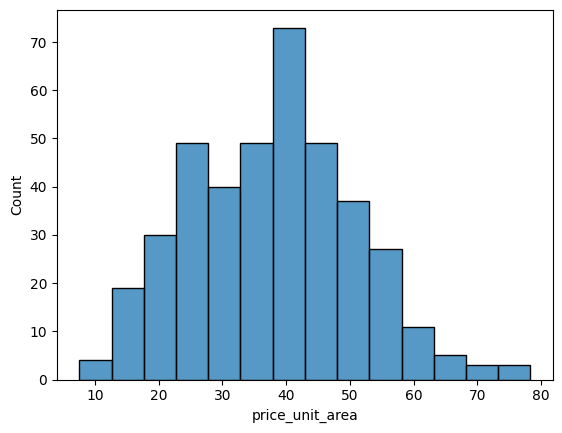

In [132]:
# let's explore our visualizations again, starting with univariate

# TODO : plot histogram of "price_unit_area" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=df_outl, x="price_unit_area")
plt.show()

<Axes: xlabel='house_age', ylabel='Count'>

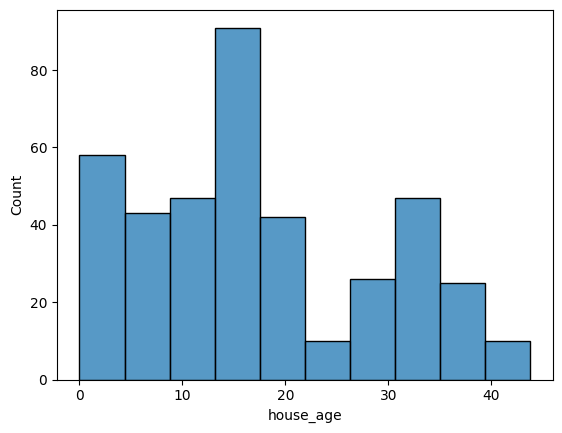

In [125]:
# TODO : plot histogram of "house_age" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=df_outl,x="house_age")

<Axes: xlabel='num_convenience_stores', ylabel='Count'>

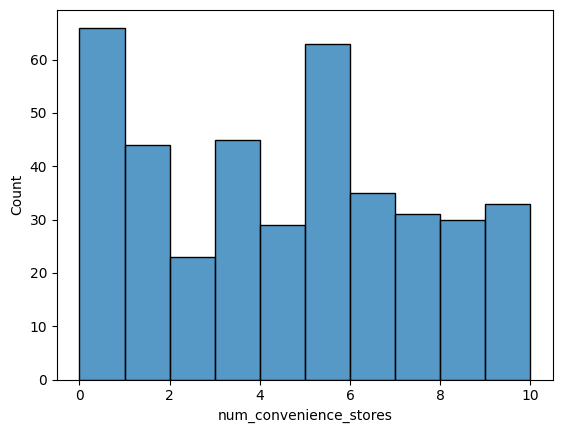

In [128]:
# TODO : plot histogram of "num_convenience_stores" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=df_outl,x="num_convenience_stores")

<Axes: xlabel='distance_to_mrt', ylabel='Count'>

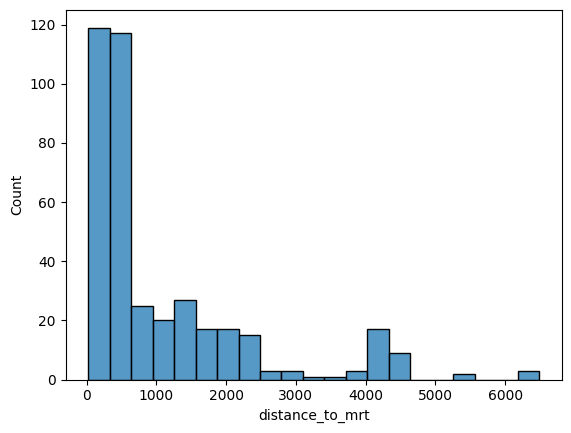

In [129]:
# TODO : plot histogram of "distance_to_mrt" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=df_outl,x="distance_to_mrt")

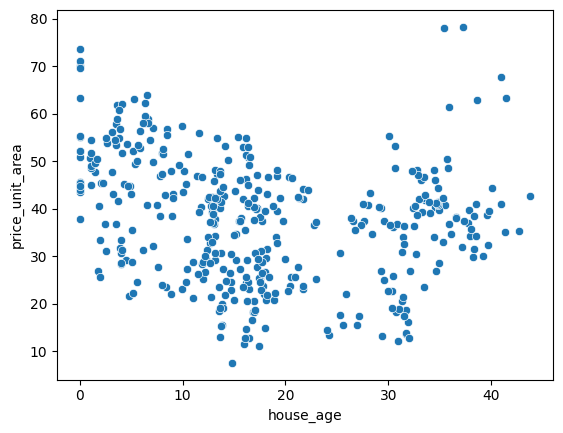

In [135]:
# next we move onto scatter-plots (bi-variate analysis)

# TODO : plot scatter plot of "house_age" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="house_age",y="price_unit_area")
plt.show()

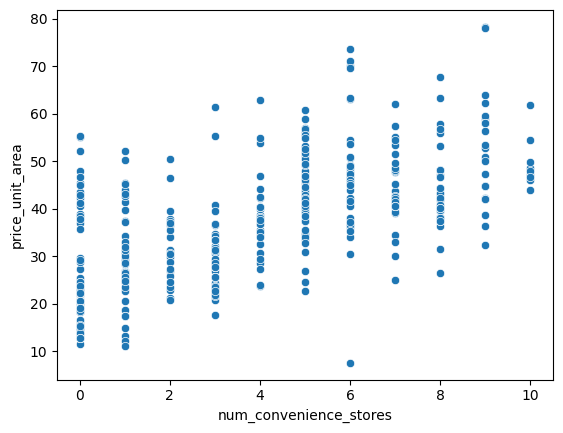

In [136]:
# TODO : plot scatter plot of "num_convenice_stores" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="num_convenience_stores", y="price_unit_area")
plt.show()

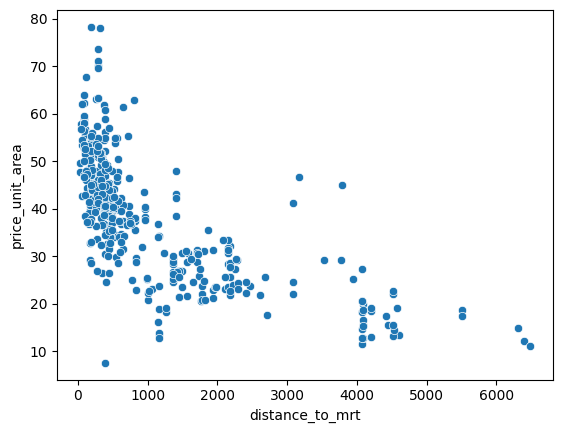

In [137]:
# TODO : plot scatter plot of "distance_to_mrt" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="distance_to_mrt",y="price_unit_area")
plt.show()

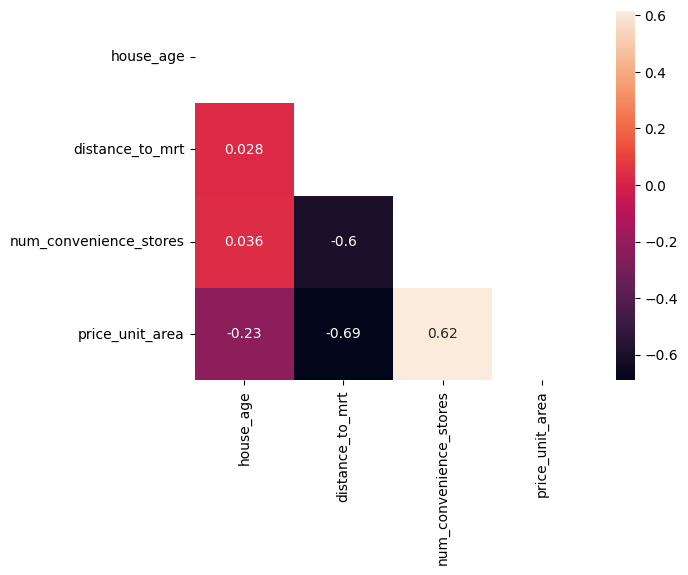

In [145]:
mask = np.triu(np.ones_like(df_outl.corr()))

sns.heatmap(df_outl.corr(), annot=True, mask=mask)
plt.show()

In [146]:
# save data for later modeling
df_drop.to_csv("../../data/processed/tpdata.csv", index=False)

In [148]:
# read processed data 

df_clean = pd.read_csv("../../data/processed/tpdata.csv")
df_clean.head()

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
0,32.0,84.87882,100.0,37.9
1,19.5,306.59470,9.0,42.2
2,13.3,561.98450,5.0,47.3
3,13.3,561.98450,5.0,54.8
4,5.0,390.56840,5.0,43.1
